In [7]:
print("hello world")

hello world


# Sample deadline
## smaller deadline

This would be the butthole of an ass ass, more importantly the *ass* is not an **ass** but it is okay\

The butt would be
### amazing

In [8]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [9]:
%pwd

'C:\\Users\\marcu\\Jupyter Notebooks'

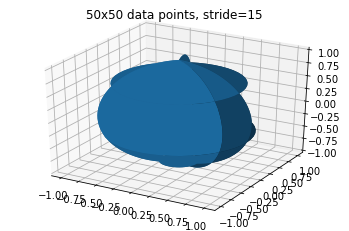

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()

N=50
stride=15
ax = fig.gca(projection='3d')
u = np.linspace(0, 2 * np.pi, N)
v = np.linspace(0, np.pi, N)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride)
ax.set_title('{0}x{0} data points, stride={1}'.format(N,stride))


plt.show()

In [1]:
# coding: utf-8

import math
import random
import pygame
import time
#balls = ["x","y","xs","ys","size","r","g","b"]
#platform = ["x1","y1","x2","y2","tangentx","tangeenty","normalx","normaly","length",]

def addBall(balls,x,y,xs,ys,s,r,g,b):
    balls.append({"x":x,"y":y,"xs":xs,"ys":ys,"size":s,"r":r,"g":g,"b":b})

def addPlatform(platform,x1,y1,x2,y2):
    dx,dy,dist=getV(x1,y1,x2,y2)
    dx,dy=normalise(dx,dy,dist)
    platform.append({"x1":x1,"y1":y1,"x2":x2,"y2":y2,"tx":dx,"ty":dy,"nx":(0-dy),"ny":dx,"length":dist})
    
def init(balls,platform):
    balls=[]
    platform=[]
    
def getV(x1,y1,x2,y2): #get length,xchange,ychange
    dx=(x2-x1)
    dy=(y2-y1)
    dist = ((dx*dx)+(dy*dy))
    dist = math.sqrt(dist)
    return (dx,dy,dist)

def normalise(dx,dy,dist): #normalise dx and dy
    if not(dist==0):
        dx2=(dx/dist)
        dy2=(dy/dist)
        return (dx2,dy2)

def ballchange(balls,index,i2,val):   #used to change one value easily
    balls[index][i2] = (balls[index][i2]+val)
    
def deleteball(balls,index): #deletes a ball
    balls.pop(index)
      
def checkBC(balls,bi1,bi2,bounce): #collision between two balls
    dx,dy,dist = getV(balls[bi1]["x"],balls[bi1]["y"],balls[bi2]["x"],balls[bi2]["y"]) #get dx,dy,length
    depth = ((balls[bi1]["size"]+balls[bi2]["size"])-dist) #calculate how much the first ball has gone into the second one
    if depth > 0: #if they are colliding
        dx,dy = normalise(dx,dy,dist) #normalise dx and dy
        depth = depth/5
        ballchange(balls,bi1,"x",(dx*(0-depth))) #move the first ball out of the second
        ballchange(balls,bi1,"y",(dy*(0-depth))) 
        ballchange(balls,bi2,"x",(dx*depth)) #move the second ball out of the first
        ballchange(balls,bi2,"y",(dy*depth))
        rvx = (balls[bi2]["xs"]-balls[bi1]["xs"]) #difference of x positions of both the balls
        rvy = (balls[bi2]["ys"]-balls[bi1]["ys"]) #difference of y positions of both the balls
        rv = (dx*rvx)+(dy*rvy)
        rv = (-1-bounce)*(rv/2) #calculate bounce
        ballchange(balls,bi1,"xs",(dx*(0-rv))) #set the velocities using rv. This piece will make the ball bounce
        ballchange(balls,bi1,"ys",(dy*(0-rv)))
        ballchange(balls,bi2,"xs",(dx*(rv)))
        ballchange(balls,bi2,"ys",(dy*(rv)))
    
def colBall(balls,index,pos,pRad,bounce): #the ball-platform collision physics
    #just like the ball to ball collision. This time, only the ball moves and not the platform.
    dx,dy,dist=getV(pos[0],pos[1],balls[index]["x"],balls[index]["y"])
    depth = ((pRad+balls[index]["size"])-dist) #calculate how much the ball has got into the platform
    if depth > 0: #if they collide
        dx,dy=normalise(dx,dy,dist) #normalise
        if dy < 0: #if it has got too much into the platform, it will mess up the bounce effect
            depth = (depth+0.1) #push it out of the platform a bit.
        ballchange(balls,index,"x",(dx*depth)) #get the ball out of the platform
        ballchange(balls,index,"y",(dy*depth))
        velop = ((dx*balls[index]["xs"])+(dy*balls[index]["ys"])) #set the velocity based on the ball velocity and how much it has got into the platform
        velop = ((0-bounce)*velop) #add the bounce effect
        ballchange(balls,index,"xs",(dx*velop)) #change the ball velovity using it's bounce(the velop variable)
        ballchange(balls,index,"ys",(dy*velop))

def checkcol(balls,platform,bi,pi,pRad,bounce): #checks if a ball is colliding with a platform
    #This function projects the vector(platform's x1,y1 to the ball position)into the platform.The colBall function
    #checks if the ball is colliding with the projected point.
    dx,dy,dist=getV(platform[pi]["x1"],platform[pi]["y1"],balls[bi]["x"],balls[bi]["y"])
    tp=((dx*platform[pi]["tx"])+(dy*platform[pi]["ty"])) #project
    if tp < 0:
        tp = 0
    if tp > platform[pi]["length"]:
        tp=platform[pi]["length"]
    colBall(balls,bi,[(platform[pi]["x1"]+(tp*platform[pi]["tx"])),(platform[pi]["y1"]+(tp*platform[pi]["ty"]))],pRad,bounce)
    
def update(balls,platform,pRad,bounce,gravity,friction,bbounce,w,h): #the main function
    bi=0
    for bi in range(len(balls)): #change the ball position according to it's velocity,gravity and friction
        if bi < len(balls):
            ballchange(balls,bi,"x",balls[bi]["xs"])
            ballchange(balls,bi,"y",balls[bi]["ys"])
            ballchange(balls,bi,"xs",0)
            ballchange(balls,bi,"ys",gravity)
            balls[bi]["xs"] = balls[bi]["xs"]*friction
            for ob in range(len(balls)): #check ball to ball collision
                if not(bi == ob): #avoid checking collission with the selected ball itself
                    checkBC(balls,bi,ob,bbounce)        
            pi=0
            for pi in range(len(platform)): #check collision with platform
                checkcol(balls,platform,bi,pi,pRad,bounce)
            if balls[bi]["x"]>w:
                deleteball(balls,bi)
            elif balls[bi]["y"]>h:
                deleteball(balls,bi)

def anToXY(angle,rad,x,y): #There is no use for this one. I made it to draw the ball angle
    x = x+(rad*(math.cos(angle)))
    y = y+(rad*(math.sin(angle)))
    return (x,y)

def drawLine(x1,y1,x2,y2,size,col):
    pygame.draw.line(win, (0,0,0), [x1,y1], [x2,y2], size+1)
    pygame.draw.circle(win, col, (x1, y1), size, size)   
    pygame.draw.circle(win, col, (x2, y2), size, size)   
    
def render(balls,platform,win,pCol,pRad): #this function does all the drawing
    #drawing
    pi=0
    for pi in range(len(platform)): #draws the platforms
        #drawLine(platform[pi]["x1"],platform[pi]["y1"],platform[pi]["x2"],platform[pi]["y2"],pRad+1,(0,0,0))
        pygame.draw.line(win, pCol, [platform[pi]["x1"],platform[pi]["y1"]], [platform[pi]["x2"],platform[pi]["y2"]], (pRad*2))
        pygame.draw.circle(win, pCol, (int(platform[pi]["x1"]), int(platform[pi]["y1"])), pRad, pRad-1)   
        pygame.draw.circle(win, pCol, (int(platform[pi]["x2"]), int(platform[pi]["y2"])), pRad, pRad-1)   
        
    pi=0
    for pi in range(len(balls)): #draw the balls
        pygame.draw.circle(win, (balls[pi]["r"],balls[pi]["g"],balls[pi]["b"]), (int(balls[pi]["x"]), int(balls[pi]["y"])), balls[pi]["size"], balls[pi]["size"])   
        pygame.draw.circle(win, (0,0,0), (int(balls[pi]["x"]), int(balls[pi]["y"])), balls[pi]["size"], 1)   

def setting1(platform,balls): #you can change this. Just the platforms and balls
    addPlatform(platform,50,200,300,500)
    addPlatform(platform,50,200,50,0)
    addPlatform(platform,300,500,800,500)

    addBall(balls,1130,-400,0,0,8,79,179,255) #light blue
    addBall(balls,1115,-380,0,2,18,255,150,255) #light pink
    addBall(balls,1100,-350,0,0,9,0,255,0) #light green

def setting2(platform,balls): #another setting I made
    addPlatform(platform,1200,30,200,130)
    addPlatform(platform,100,0,100,150)
    addPlatform(platform,100,150,200,250)
    addPlatform(platform,200,250,500,300)
    addPlatform(platform,500,300,800,300)
    addPlatform(platform,800,300,850,270)
    addPlatform(platform,1000,200,850,400)
    addPlatform(platform,850,400,750,480)
    addPlatform(platform,750,480,200,490)
    addPlatform(platform,200,490,170,470)
    addPlatform(platform,10,300,20,500)
    addPlatform(platform,20,500,200,600)
    addPlatform(platform,200,600,800,650)
    addPlatform(platform,800,650,1000,650)
    addPlatform(platform,1000,650,1040,630)
    addPlatform(platform,1200,30,1200,-500)

    addBall(balls,1125,-60,0,0,8,255,150,0) #orange
    addBall(balls,1140,-80,0,0,9,255,255,255) #white
    addBall(balls,1135,-90,0,0,15,255,255,0) #yellow
    addBall(balls,1128,-150,0,0,22,255,0,0) #red
    addBall(balls,1130,-120,0,0,8,79,179,255) #light blue
    addBall(balls,1115,-250,0,2,18,255,150,255) #light pink
    addBall(balls,1100,-30,0,0,9,0,255,0) #light green
    addBall(balls,1070,-30,0,2,12,255,0,255) #light purple
    addBall(balls,1050,-30,0,0,9,0,255,255) #light cyan
    addBall(balls,1050,-70,0,0,16,150,0,255) #purple

    

def setting3(balls,platform):
    #custom
    print("nothing here")
    
def physics(balls,platform,pRad,bounce,gravity,fric,bbounce,win,pCol,w,h):
    render(balls,platform,win,pCol,pRad)
    update(balls,platform,pRad,bounce,gravity,fric,bbounce,w,h)

def mainLoop():
    gravity = 0.05
    bounce = 1.4
    bbounce = 1.4
    pRad = 7
    fric = 0.05
    pCol = (79,179,255)
    #width and hieght of the window. You can change this
    w = 1365 #the maximum width and hieght I can use in my monitor without covering the dock 
    h = 715
    #the main code
    balls = []
    platform = []
    pygame.init()
    init(balls,platform) #clear everything
    setting1(platform,balls)
    size = (w, h)
    win = pygame.display.set_mode(size)
    pygame.display.set_caption('Physics Engine')
    clock = pygame.time.Clock()
    done = True
    addp = "n"

    while done: 
        x,y = pygame.mouse.get_pos()
        win.fill((180,180,180))
        for event in pygame.event.get(): 
            if event.type == pygame.QUIT:
                done = False
            if event.type == pygame.KEYDOWN: #user interface-sensing mouse clicks for adding balls
                if event.key == pygame.K_LCTRL:
                    x,y = pygame.mouse.get_pos()
                    if addp == "n": #If pressing ctrl for the first time, start a line
                        x1 = x
                        y1 = y
                        addp = "y"
                    if not(x1 == x) or not(y1 == y):
                        if addp == "y": #if pressing for the scond time, add a platform
                            pygame.draw.line(win, pCol, (x1, y1), (x, y),pRad*2)
                            if not(x1 == x) or not(y1 == y):
                                addp = "n"
                                addPlatform(platform,x1,y1,x,y)                              
                elif event.key == pygame.K_SPACE: #Delete a ball when space key is pressed and the mouse is touching that ball
                    x,y = pygame.mouse.get_pos()
                    looping = True
                    i = 0
                    if len(balls) > 0:
	                    while ((looping and i <= len(balls))): #repeat until each ball is checked or mouse is touching a ball
	                        dx,dy,dist = getV(x,y,balls[i]["x"],balls[i]["y"])
	                        if dist <= balls[i]["size"]:
	                            deleteball(balls,i)
	                            looping = False
	                        i+=1
	                        if i == len(balls):
                                    break

            elif event.type == pygame.MOUSEBUTTONDOWN: #If mouse clicked, add a ball
                x,y = pygame.mouse.get_pos()
                addBall(balls,x,y,0,5, 40 , 110,120,250)               
                dx,dy,dist = getV(x,y,15,15) #Sensing the reset button
                if int(dist) < 15:
                    balls = []
                    platform = []

        if addp == "y": #draw the temporary line from mouse to start of the line
            pygame.draw.line(win, pCol, (x1, y1), (x, y),pRad*2)
            pygame.draw.circle(win, pCol,(x1, y1),pRad, pRad)  
            pygame.draw.circle(win, pCol,( x, y,), pRad, pRad)  

        physics(balls,platform,pRad,bounce,gravity,fric,bbounce,win,pCol,w,h) #This function contains the physics engine
        pygame.draw.circle(win, (255,150,0),(15, 15),15, 15)  #the reset button
        pygame.display.flip()
        clock.tick(300) 
        time.sleep(0.03)

mainLoop()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
